### Importando bibliotecas:

In [84]:
# Importando todas as bibliotecas necessárias:
import numpy as np
import matplotlib.pyplot as plt

# Importando a biblioteca Scikit Learn:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

### Manipulando os dados:

In [73]:
# Definindo o número de amostras:
N = 1000

# Definindo a semente para números pseudo aleatórios
np.random.seed(42)

# Criando as features:
x = np.sort(5 * np.random.rand(N, 1), axis = 0)

# Criando as labels: 
y      = np.sin(x).ravel()
y_orig = np.sin(x).ravel()

# Criando o ruído e adicionando:
y += 0.1 * np.random.randn(N)

# Fazendo a separação em dados de treinamento e teste:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8)

In [74]:
# Setando os parâmetros para o Grid-Search:
param_grid = [{'weights':['uniform','distance'], 'n_neighbors':[1, 2, 3, 4, 5, 
                                                                6, 7, 8, 9, 10,
                                                                15, 20]}]

### Encontrando os valores ótimos:

In [79]:
# Instanciando o classificador k-NN:
knn_regressor = KNeighborsRegressor()

# Instânciando o GridSearchCV:
gridsearchcv = GridSearchCV(knn_regressor, param_grid, cv=5, verbose=3, n_jobs=-1)

# Efetuando o treinamento do modelo;
gridsearchcv.fit(x_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.0s finished


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                          20],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

### Exibindo os resultados:

In [80]:
print('O melhor parâmetro encontrado foi: {}'.format(gridsearchcv.best_params_))
print('A melhor probabilidade encontrada foi: {:.2f}%'.format(gridsearchcv.best_score_* 100))

O melhor parâmetro encontrado foi: {'n_neighbors': 4, 'weights': 'uniform'}
A melhor probabilidade encontrada foi: 97.63%


In [81]:
# Definindo os valores encontrados para o Regresspr k-NN:
knn_regressor = KNeighborsRegressor(n_neighbors=4, weights='uniform')

# Fazendo o treinamento do modelo pelo Regressor k-NN:
knn_regressor.fit(x_train, y_train)

# Fazendo a predição dos valores:
predict = knn_regressor.predict(x)

Text(0.5, 1.0, "KNeighborsRegressor (k = 5, weights = 'uniform')")

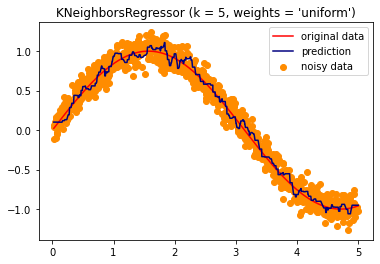

In [82]:
# Plotagem dos dados orginais, preditos e ruído.
plt.scatter(x, y, color='darkorange', label='noisy data')
plt.plot(x, y_orig, color='red', label='original data')
plt.plot(x, predict, color='navy', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

Como calcular o erro quadrático médio pela Biblioteca Scikit Learn: https://www.it-swarm-pt.tech/pt/python/scikit-learn-como-calcular-o-erro-quadratico-medio-quadratico-rmse-em-porcentagem/833484771/

In [99]:
# Para o conjunto de TREINAMENTO
print('Para o conjunto de treinamento: ')

# Predizendo:
predict_train = knn_regressor.predict(x_train)

# Calculando o erro quadrático médio:
meanSquaredError = mean_squared_error(y_train, predict_train) * 100

# Imprimindo o resultado:
print('MSE: {:.2f}%'.format(meanSquaredError))



# Para o conjunto de teste:
print('Para o conjunto de teste:')

# Predizendo: 
predict_test = knn_regressor.predict(x_test)

# Calculando o erro quadrático médio:
meanSquaredError = mean_squared_error(y_test, predict_test) * 100

# Imprimindo o valor encontrado:
print('MSE: {:.2f}%'.format(meanSquaredError))

Para o conjunto de treinamento: 
MSE: 0.72%
Para o conjunto de teste:
MSE: 1.29%
